#Genome Assembly Using Reads




##1. Debruign graph class
1. Representation of Graph using Adjacency List
2. edge denote kmer, head node denote kmer[:-1], tail node denote kmer[1:]
3. diff node denotes diff string

In [13]:
from pygraphviz import *
class debruijnGraph():
    """docstring for debruijnGraph"""
    class node():
        """docstring for node"""
        def __init__(self, string):
            self.id = -1
            self.value = string
            self.head = []          
            self.tail = []
    @staticmethod
    def revComplemnet(str):
        complDic = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}
        compStr = ''.join([complDic[c] for c in str])
        return compStr[::-1] 
    def addNode(self, value):
        if value not in self.hash:
            i = debruijnGraph.node(value)
            i.id = len(self.nodes)
            self.hash[value] = i.id
            self.nodes.append(i)
    def addEdge(self, v1, v2):
        i = self.hash[v1]
        j = self.hash[v2]
        node1 = self.nodes[i]
        node2 = self.nodes[j]
        node1.tail.append(j)
        node2.head.append(i)
    def rmEdge(self, v1, v2):
        i = self.hash[v1]
        j = self.hash[v2]
        node1 = self.nodes[i]
        node2 = self.nodes[j]
        node1.tail.remove(j)
        node2.head.remove(i)

    def __init__(self, readList, k):
        self.kmerList = []
        self.hash = {}
        self.nodes = []
        self.head = []
        self.tail = []
        
        #print self.G.node_attr['labelfontcolor'], self.G.edge_attr['labelfontcolor']
        
        #gen superStringList
        for read in readList:
            #print read
            rev_read = debruijnGraph.revComplemnet(read)
            for seq in [read, rev_read]:
                for i in xrange(len(seq)-k+1):
                    self.kmerList.append(seq[i:i+k])
        #gen nodes && edge 
        for kmer in self.kmerList:
            prefix = kmer[:-1]
            suffix = kmer[1:]
            self.addNode(prefix)
            self.addNode(suffix)
            self.addEdge(prefix, suffix)
          
        #gen head nodes && tail nodes
        for i, node in enumerate(self.nodes):
            if len(node.head) == 0 or len(node.head)%2 != 0: self.head.append(i)
            if len(node.tail) == 0 or len(node.head)&2 != 0: self.tail.append(i)
    def printAdjacencyList(self):
        for node in self.nodes:
            print node.value,
            for i in node.tail:
                print self.nodes[i].value,
            print
    def graphviz(self, pngName):
        G = AGraph(strict=False, directed=True)
        G.graph_attr.update(label='Debruijn graph', fontsize='20.0')
        G.node_attr.update(color='#336699', fontcolor='#333366')
        G.edge_attr.update(color='#99CC33', fontcolor='#333366')
        for node in self.nodes:
            G.add_node(node.value)
            head = node
            for i in node.tail:
                tail = self.nodes
                G.add_edge(head.value, self.nodes[i].value, label=head.value+tail.value[-1])
        #G.layout(prog='dot')
        G.layout(prog='circo')
        G.draw(pngName)
    def walkPath(self):
        def __walk_core(self, nodei, path):
            if len(nodei.tail) == 0:
                return
            nodej = self.nodes[nodei.tail[0]]
            edge = nodei.value+nodej.value[-1]
            path.append(edge)
            self.rmEdge(nodei.value, nodej.value)
            revEdge = debruijnGraph.revComplemnet(edge)
            self.rmEdge(revEdge[:-1], revEdge[1:])
            __walk_core(self, nodej, path)
        
        path = []
        if len(self.head) != 0: index = self.head[0]
        else: index = 0 
        __walk_core(self, self.nodes[index], path)

        return path

##2. Main func

In [14]:
if __name__ == '__main__':
    fp = open('GASM.txt', 'r')
    readList = map(lambda x:x.strip(), fp.readlines())
    g = debruijnGraph(readList, 4)
    g.graphviz('GASM.png')

    path = g.walkPath()
    #superString = path[0]
    superString =''
    for s in path[:-1]:
        superString += s[-1]
    print path, superString, debruijnGraph.revComplemnet(superString)
    #g.printAdjacencyList()
    fp.close()

['AATC', 'ATCT', 'TCTG', 'CTGT', 'TGTA', 'GTAA', 'TAAT', 'AATC'] CTGTAAT ATTACAG


##3. Display debruign graph

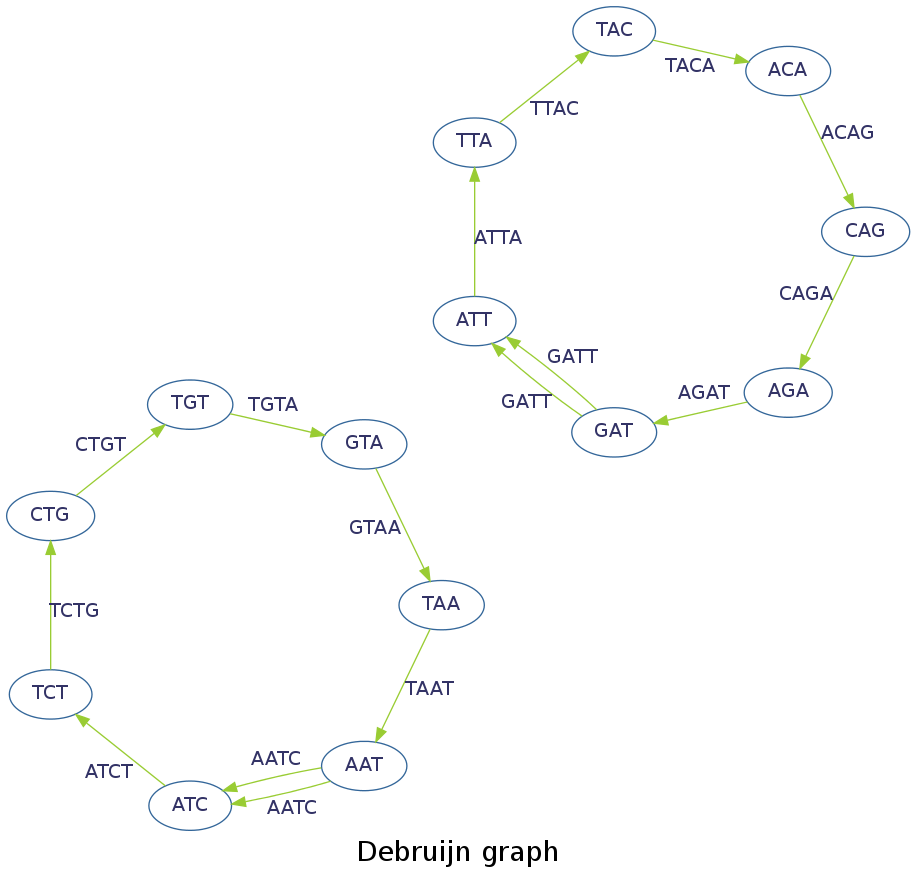

In [16]:
from IPython.display import *
Image('GASM.png')